# 0.) Import and Clean data

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
names = df[["country"]].copy()
X = df.drop(["country"], axis = 1)

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [2]:
# KMean?

In [6]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)
kmeans

KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
X.columns[-2]

'total_fer'

In [10]:
X.columns[7]

'total_fer'

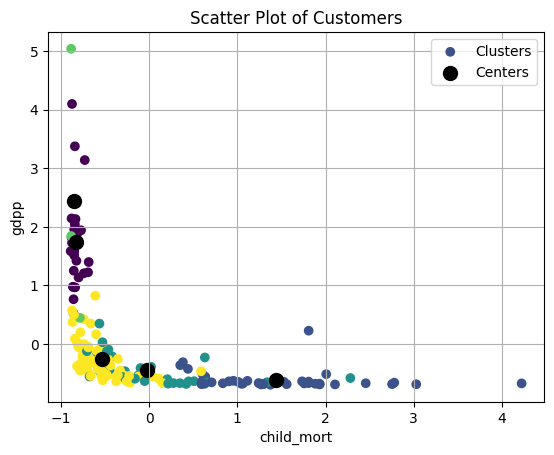

In [11]:
import matplotlib.pyplot as plt

x1_index = 0 # compare child mortality 
x2_index = -1 # compare with GDP percapita you can use -1 for counting backwards or use 8 counting forward


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [12]:
WCSSs = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [13]:
WCSSs #if see big number means not try enough of init so end rp with large inertia that stable but noe optimal, might happen in large data set

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 620.058534407621,
 564.0172041272717,
 497.78069970989986,
 463.047623247906,
 434.6525933754574,
 400.1234814265279,
 373.1015993843937,
 358.74951335102287,
 338.35863441144465,
 316.9485899093433]

In [14]:
# To write it short
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1, 15)]
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3917199643636,
 619.9371152246033,
 574.9169628484455,
 516.0489554370672,
 483.4705021174264,
 428.3155297045929,
 400.7147960678182,
 376.0183903369947,
 360.3701369594295,
 340.1575884257803,
 326.05056782195203]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

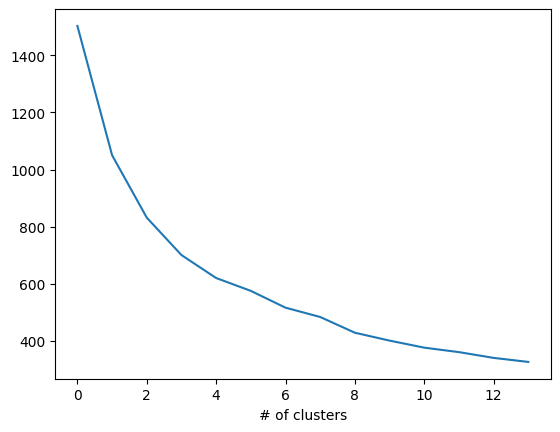

In [15]:
plt.plot(WCSSs)
plt.xlabel("# of clusters")
plt.show()
# if wanna test robustness can try new parameters. if we get same pattern and optimal solution, this means robust

# 6.) Do the same for a silhoutte plot

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
SCs = []
ks = range(2, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [18]:
kmeans = KMeans(n_clusters = 2, n_init = 30, init = "random").fit(X_scaled)

In [19]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [20]:
output = pd.concat([preds, df], axis = 1)

In [21]:
output
print("Cluster 1: ")
list(output.loc[output[0] == 0, "country"])

Cluster 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [22]:
print("Cluster 2: ")
list(output.loc[output[0] == 1, "country"])

Cluster 2: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

#### Write an observation
I did not find some abnormally classified countries in the first category while I found some potential miss misclassifications in the second category such as China, Sri Lanka, Thailand, and Vietnam which did not align traditional economic perspectives.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [ ]:
# Kmeans... have to unscaled yourself

In [23]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [24]:
output.drop("country", axis = 1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [25]:
output.drop("country", axis = 1).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


In [26]:
Q8DF = pd.concat([preds, X], axis =1)

In [27]:
Q8DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [28]:
Q8DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

From the model, I found that the means of child mortality rate, income, and GDP per capita of the two groups were noticeably different (5 times differences) as well as the standard deviation of these three factors. Hence, I think these three countries' characteristics will be good features for grouping the countries